### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [23]:
Original_data = pd.read_csv('C:\\Users\\risaa\\Module 5.1 assignment\\coupons.csv') # saves csv

In [24]:
Original_data.head()  #shows first 5 rows

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [25]:
Original_data.info()
# Column 'Car' is missing most of its values.
# Columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurtant20to50' is missing a few values
# I would consider the 'Car' column as problematic data and remove it from my findings.
# As for the others, I can remove the NaN rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [26]:
Original_data.pop('car')         # removed car column
data = Original_data.dropna()     # removed rows that containt NaN
data.info()                    # shows column data
data.head()                   # shows first 5 rows of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [215]:
accept = data['Y'].value_counts()[1]       # finds how many people used coupon
total = data['Y'].shape[0]                 # uses shape of dataframe to determine total person count
Prop_accepted = accept/total               # finds proportion
print('*'*100)                             # creates border so displayed data is easy to read
print('The Proportion of Total Observations who Accepted the Coupons is: '+str(Prop_accepted))
print('*'*100)

****************************************************************************************************
The Proportion of Total Observations who Accepted the Coupons is: 0.5693352098683666
****************************************************************************************************


5. Use a bar plot to visualize the `coupon` column.

coupon                 Y
Bar                    0    1125
                       1     788
Carry out & Take away  1    1682
                       0     598
Coffee House           0    1922
                       1    1894
Restaurant(20-50)      0     785
                       1     632
Restaurant(<20)        1    1881
                       0     772
dtype: int64


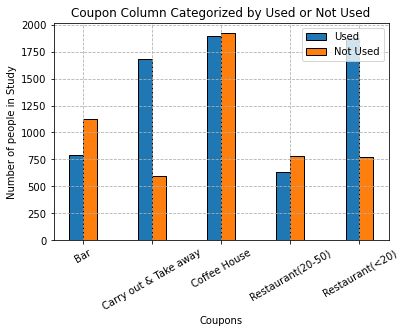

In [216]:
coupon_data = data.groupby('coupon')[['Y']].value_counts() # Finds individual numbers for used or not used coupons based on coupon type
print(coupon_data)                     # shows coupon data used in bar graph

yes = [788, 1682, 1894, 632, 1881]     # Data taken from coupon_data
no =  [1125, 598, 1922, 785,  772]     # Data taken from coupon_data
  
r = np.arange(5)           # creates 5 x axis locations
width = 0.2                # sets width of bars
  
plt.bar(r, yes, width = width, edgecolor = 'black', label='Used')               # display bar graph
plt.bar(r + width, no, width = width, edgecolor = 'black', label='Not Used')    # display bar graph
  
plt.xlabel("Coupons")                                          # Set x axis label
plt.ylabel("Number of people in Study")                        # Set y axis label
plt.title("Coupon Column Categorized by Used or Not Used")     # Set title

plt.xticks(r + width/2,['Bar','Carry out & Take away','Coffee House','Restaurant(20-50)', 'Restaurant(<20)'], rotation=30) # sets x axis minor labels
plt.legend()    # shows legend
  
plt.show()      # shows figure

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

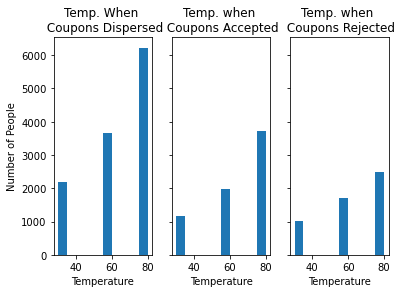

In [209]:
AcceptedCoupons = data[data['Y'] == 1][['temperature']]    # gathers temperatures for all succesfull coupons
NOTAcceptedCoupons = data[data['Y'] == 0][['temperature']] # gathers temperatures for all NONsuccesfull coupons
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)        # creates subplot

ax1.hist(data[['temperature']])          # histogram all temperature data
ax1.set_title('Temp. When \n Coupons Dispersed')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Number of People')

ax2.hist(AcceptedCoupons)                # histogram of temperatures when coupons were accepted
ax2.set_title('Temp. when \n Coupons Accepted')
ax2.set_xlabel('Temperature')

ax3.hist(NOTAcceptedCoupons)             # histogram of temperatures when coupons were rejected
ax3.set_title('Temp. when \n Coupons Rejected')
ax3.set_xlabel('Temperature')


Text(0.5, 1.0, 'Restaurant \n 20 or less')

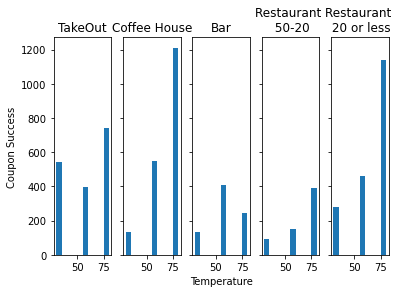

In [218]:
AllAccepted = data[data['Y'] == 1]         # gathers all data for successful coupons

bar_temp = AllAccepted[AllAccepted['coupon']=='Bar']['temperature']  # finds temperatures for which coupons were successfull given the establishment
TakeOut = AllAccepted[AllAccepted['coupon']=='Carry out & Take away']['temperature']
Coffee_House = AllAccepted[AllAccepted['coupon']=='Coffee House']['temperature']
Restaurant50_20 = AllAccepted[AllAccepted['coupon']=='Restaurant(20-50)']['temperature']
Restaurant_20 = AllAccepted[AllAccepted['coupon']=='Restaurant(<20)']['temperature']


f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharey=True)  # creates sub plots

ax1.hist(TakeOut)
ax1.set_title('TakeOut')
ax1.set_ylabel('Coupon Success')

ax2.hist(Coffee_House)
ax2.set_title('Coffee House')

ax3.hist(bar_temp)
ax3.set_title('Bar')
ax3.set_xlabel('Temperature')

ax4.hist(Restaurant50_20)
ax4.set_title('Restaurant \n 50-20')

ax5.hist(Restaurant_20)
ax5.set_title('Restaurant \n 20 or less')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [455]:
bar = data[data['coupon']=='Bar']    #creates new dataframe
bar.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. What proportion of bar coupons were accepted?


In [456]:
accepted = bar['Y'].value_counts()[1] # gets value of people that used coupon
total = bar.shape[0]                  # all coupons used or unused
prop = (accepted/total).round(4)      # calculates proportion and trunkates value.
print('*'*100)                             # creates border so displayed data is easy to read
print('The Proportion of Total Observations who Accepted the Coupons for a bar is: '+str(prop))
print('*'*100)

****************************************************************************************************
The Proportion of Total Observations who Accepted the Coupons for a bar is: 0.4119
****************************************************************************************************


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [457]:
bar_accept = bar[bar['Y']==1]            # returns dataframe where Y == 1
bar3fewer = bar_accept['Bar'].value_counts()[0:3].sum()    # returns values for customers who attend the bar less than 3 times per month
bar3more = bar_accept['Bar'].value_counts()[3:5].sum()     # returns values for people who use the bar more than 3 times per month
prop3fewer = (bar3fewer/total).round(4)
prop3more = (bar3more/total).round(4)
print('*'*100)                             # creates border so displayed data is easy to read
print('The acceptance rate for the Coupons for a bar is: '+str(prop3fewer)+' for people who go to bars less than 3 times a month')
print('*'*100)
print('The acceptance rate for the Coupons for a bar is: '+str(prop3more)+' for people who go to bars more than 3 times a month')
print('*'*100)

****************************************************************************************************
The acceptance rate for the Coupons for a bar is: 0.3351 for people who go to bars less than 3 times a month
****************************************************************************************************
The acceptance rate for the Coupons for a bar is: 0.0768 for people who go to bars more than 3 times a month
****************************************************************************************************


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [458]:
bar25 = bar_accept            # new dataframe with filter Y == 1 
bar25['age'] = bar25['age'].str.replace("plus","").str.replace("below","").astype('float') # cleans age column and changes str to float
bar25 = bar25[bar25['age']>24]              # return all data with age greater than 24
over25Bar = bar25['Bar'].value_counts()[2:5].sum() # entries 2 - 5 correspond to people going to the bar more than once per month.
total = bar25['Bar'].value_counts().sum()
prop25more = (over25Bar/ total).round(4)
print('*'*100)
print('The acceptance rate for the Coupons is: '+str(prop25more)+' for people who go to bars more than once a month and are over 25')
print('*'*100)
print('The Proportion of Total Observations who Accepted the Coupons for a bar is: '+str(prop))
print('*'*100)
print('Over all more people accept the coupons for a bar if they are younger than 25 and go less often to bars')
print('*'*100)

****************************************************************************************************
The acceptance rate for the Coupons is: 0.3574 for people who go to bars more than once a month and are over 25
****************************************************************************************************
The Proportion of Total Observations who Accepted the Coupons for a bar is: 0.4119
****************************************************************************************************
Over all more people accept the coupons for a bar if they are younger than 25 and go less often to bars
****************************************************************************************************


C:\Users\risaa\AppData\Local\Temp\ipykernel_12356\4213817603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar25['age'] = bar25['age'].str.replace("plus","").str.replace("below","").astype('float')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [459]:
barNokid = bar_accept                        # create new dataframe
barNokid = barNokid[barNokid['passanger']!='Kid(s)']    # remove kids from passanger column
barNokid = barNokid[barNokid['Bar']!=('never')]         # removes never from bar column
barNokid = barNokid[barNokid['Bar']!=('less1')]         # removes less1 from bar coloumn
barNokid_sum = barNokid['Bar'].value_counts().sum()     # sums remaining entries for customers that go to bar more than once per month
propNokid = (barNokid_sum/total).round(4)
print('*'*100)
print('Occupations farming, fishing, or forestry is already excluded when we apply filter (no kids and visit bar more than once a month')
print('*'*100)
print('The Acceptance rate of the Coupons is: '+str(propNokid)+' for people  who go more than once per month to bars and have no kid passenger')
print('*'*100)
barNokid['occupation'].value_counts()

****************************************************************************************************
Occupations farming, fishing, or forestry is already excluded when we apply filter (no kids and visit bar more than once a month
****************************************************************************************************
The Acceptance rate of the Coupons is: 0.6787 for people  who go more than once per month to bars and have no kid passenger
****************************************************************************************************


Unemployed                                   57
Student                                      43
Sales & Related                              42
Management                                   35
Office & Administrative Support              30
Computer & Mathematical                      27
Arts Design Entertainment Sports & Media     17
Business & Financial                         15
Protective Service                           12
Food Preparation & Serving Related           11
Healthcare Practitioners & Technical         11
Legal                                        10
Healthcare Support                           10
Education&Training&Library                    8
Production Occupations                        8
Transportation & Material Moving              7
Architecture & Engineering                    6
Construction & Extraction                     6
Personal Care & Service                       6
Installation Maintenance & Repair             5
Community & Social Services             

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [460]:
bar6 = bar_accept            # new dataframe
bar6 = bar6[bar6['passanger']!='Kid(s)']              # removes kids from passanger column
bar6 = bar6[bar6['Bar']!=('never')]                   # removes never from bar column
bar6 = bar6[bar6['Bar']!=('less1')]                   # removes less1 from bar coloumn
bar6 = bar6[bar6['maritalStatus']!='Widowed']         # removes widowed from marital status
bar6sum = bar6['maritalStatus'].value_counts().sum()
prop6 = (bar6sum/total).round(4)

bar7 = bar_accept
bar7 = bar7[bar7['Bar']!=('never')]                      #
bar7 = bar7[bar7['Bar']!=('less1')]                      # similar to above
bar7 = bar7[bar7['age']<30]
prop7 = (bar7.shape[0]/total).round(4)

bar8 = bar_accept
bar8 = bar8[bar8['RestaurantLessThan20']!=('1~3')]
bar8 = bar8[bar8['RestaurantLessThan20']!=('less1')]
bar8 = bar8[bar8['RestaurantLessThan20']!=('never')]
bar8 = bar8[bar8['income']!=('$37500 - $49999')]
bar8 = bar8[bar8['income']!=('$12500 - $24999')]          # similar to above
bar8 = bar8[bar8['income']!=('$25000 - $37499')]
bar8 = bar8[bar8['income']!=('Less than $12500')]

bar8sum = bar8['income'].value_counts().sum()
prop8 = (bar8sum/total).round(4)


print('*'*100)
print('Bars more than once a month, no kids, not widowed: '+str(prop6))
print('*'*100)
print('Bars more than once a month, under age 30: '+str(prop7))
print('*'*100)
print('Cheap restuarants more than 4 times per month and income less than 50k: '+str(prop8))

****************************************************************************************************
Bars more than once a month, no kids, not widowed: 0.6787
****************************************************************************************************
Bars more than once a month, under age 30: 0.426
****************************************************************************************************
Cheap restuarants more than 4 times per month and income less than 50k: 0.2942


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# I hypothesize that the group that will most likely accept a coupon for a bar will be
# younger than 30. The will not have kid passengers and hardly go to bars.  